To find out how good the model predictions are, we need to check predictions against previously unseen samples that were not used for training. Usually, 30% of the available samples are reserved for testing while remaining 70% of samples are used for training.

By comparing predicted values against known results in test data, we can assess overall model performance

Common Techniques for evaluating performance:

Visually observe using Plots
Residual Histograms
Evaluate with Metrics like Root Mean Square Error (RMSE)
While Plots are good for humans to visually observe the results, we often need a single metric that can indicate quality of a model. This can be useful for programmatically identifying which model is performing better (for example: using automatic model tuning to select the best performing model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Air Passengers Data
### Columns
* Passengers = Actual Number of passengers who traveled by air
* Model1_Prediction = Number of Passengers predicted by model 1
* Model2_Prediction = Number of Passengers predicted by model 2
* Model3_Prediction = Number of Passengers predicted by model 3
* Model4_Prediction = Number of Passengers predicted by model 4
* We are going to compare performance of these four models

How many passengers are going to travel by air this year?

In [3]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df_air = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\Data Science\airpassengers_sample.csv",index_col=0)

In [4]:
df_air

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750
2013,16.69,316.23,743.17,800,740,900,750
2014,17.43,318.62,762.71,745,760,1100,750
2015,18.12,321.04,798.22,780,790,1200,750
2016,18.62,323.41,824.04,800,825,1500,750


## Plot Data
Compare performance visually

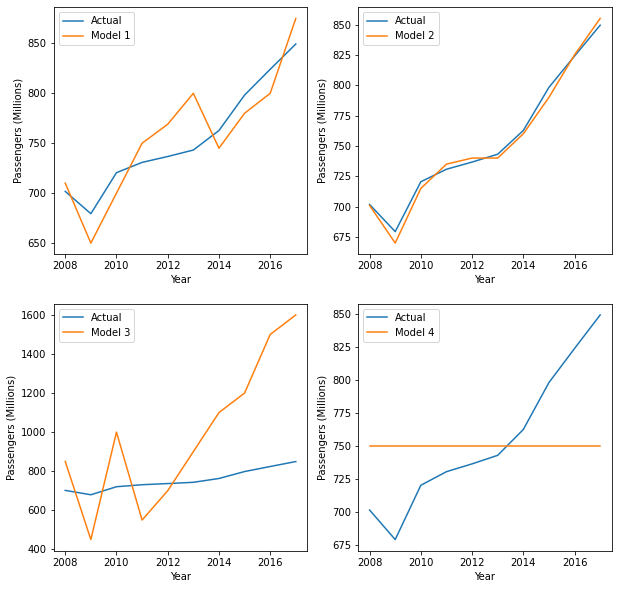

In [5]:
plt.figure(figsize=(10,10))

# Plot Actual versus predictions by each model
# We are going to draw 4 plots in a 2 x 2 grid
# 221 = 2 rows, 2 columns, 1st sub plot
# 222 = 2 rows, 2 columns, 2nd sub plot
# and so forth

# Model 1
plt.subplot(221)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model1_Prediction'],label='Model 1')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 2
plt.subplot(222)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model2_Prediction'],label='Model 2')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 3
plt.subplot(223)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model3_Prediction'],label='Model 3')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 4
plt.subplot(224)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model4_Prediction'],label='Model 4')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

plt.show()

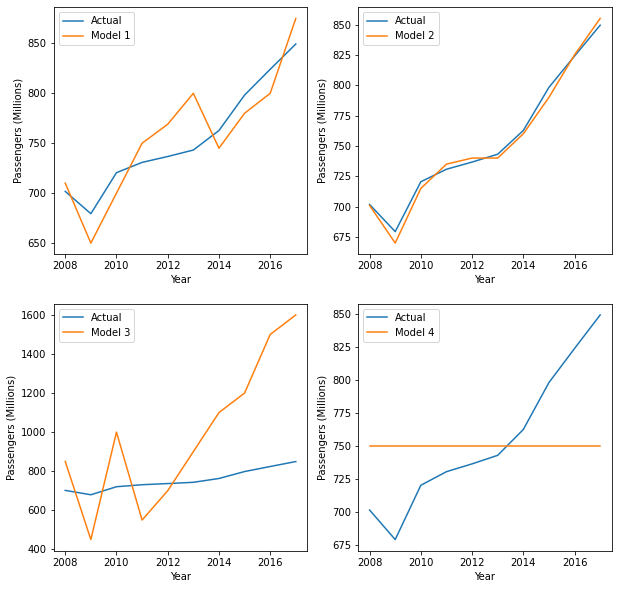

In [6]:
# Same plot as above...more concise code
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.plot(df_air['Passengers'], label='Actual')
    plt.plot(df_air[model.replace(' ','') + '_Prediction'],
             label=model)
    plt.xlabel('Year')
    plt.ylabel('Passengers (Millions)')
    plt.legend()

From the plots, we can observe that Model 1 and Model 2 appears to be pretty close to actuals. Model 3 plot is not matching with actuals. Model 4 is predicting a constant value

## Root Mean Square Error (RMSE)
Compares Actual and Predicted values and arrives at a single metric.
Smaller RMSE value indicates better predictive quality.
Let's compute the RMSE metric for each of the models

In [8]:
# RMSE
for model in models:
    print (model)
    mse = mean_squared_error(df_air['Passengers'], 
                             df_air[model.replace(' ','') + '_Prediction'])
    print(" Mean Squared Error: {0:.2f}".format(mse))
    print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Model 1
 Mean Squared Error: 787.38
 Root Mean Square Error: 28.06
Model 2
 Mean Squared Error: 26.54
 Root Mean Square Error: 5.15
Model 3
 Mean Squared Error: 150686.81
 Root Mean Square Error: 388.18
Model 4
 Mean Squared Error: 2661.81
 Root Mean Square Error: 51.59


In [9]:
#We can confirm using RMSE that Model 2 produces best outcome

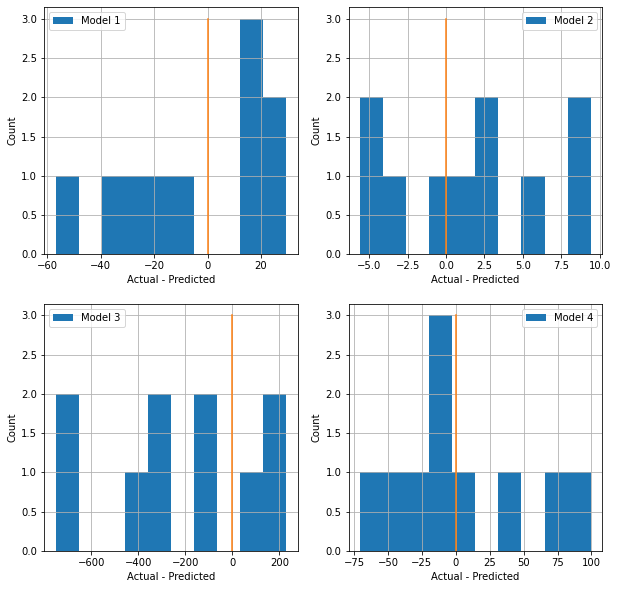

In [10]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']
        
    plt.hist(residual,
             label=model)
    plt.plot([0,0],[0,3])
    plt.xlabel('Actual - Predicted')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()

In [11]:
# Let's print actual counts
# How many under predictions and over predictions
# Actual - Predicted
# Positive Value indicates Actual is more than predicted (under estimation)
# Negative Value indicates Actual is less than predicted (over estimation)
# Since our test dataset has only 10 samples, it hard to find patterns.
# But, even here, Model 3 appears to be different from other models
# as it over predicting for larger number of samples

for model in models:
    print (model)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']
    # Count number of values greater than zero and less than zero
    value_counts = (residual > 0).value_counts(sort=False)
    
    print(' Under Estimation: ', value_counts[True]) # difference is greater than 0
    print(' Over  Estimation: ',  value_counts[False]) # difference is less than 0

Model 1
 Under Estimation:  5
 Over  Estimation:  5
Model 2
 Under Estimation:  6
 Over  Estimation:  4
Model 3
 Under Estimation:  3
 Over  Estimation:  7
Model 4
 Under Estimation:  4
 Over  Estimation:  6


### Summary
*** In this example, Model 2 has the best performance followed by Model 1.
*** We can confirm this by visual observation using plots and by comparing RMSE metrics

## Binary Classifier Metrics
positive = number of actual positives (count)
negative = number of actual negatives (count)
True Positive = tp = how many samples were correctly classified as positive (count)
True Negative = tn = how many samples were correctly classified as negative (count)
False Positive = fp = how many negative samples were mis-classified as positive (count)
False Negative = fn = how many positive samples were mis-classified as negative (count)

### True Positive Rate (TPR, Recall, Probability of detection) = True Positive/Positive
How many positives were correctly classified? (fraction)
Recall value closer to 1 is better. closer to 0 is worse
Example: Radar Operator watching the skies for enemy planes.

Positive Class = Enemy Plane

Negative Class = Friendly Plane

True Positive Rate or Probability of detection – is the probability of correctly classifying an enemy plane </i>

### True Negative Rate = True Negative/Negative
How many negatives were correctly classified? (fraction)
True Negative Rate value closer to 1 is better. closer to 0 is worse
True negative rate – is the probability of correctly classifying a friendly plane

### False Positive Rate (FPR, Probability of false alarm) = False Positive/Negative
How many negatives were mis-classified as positives (fraction)
False Positive Rate value closer to 0 is better. closer to 1 is worse
Another name for this is Probability of false alarm – is the probability of mis-classifying a friendly plane as an enemy plane

### False Negative Rate (FNR, Misses) = False Negative/Positive
How many positives were mis-classified as negative (fraction)
False Negative Rate value closer to 0 is better. closer to 1 is worse
False Negative Rate - is the probability of mis-classifying an enemy plane as a friendly plane

### Precision = True Positive/(True Positive + False Positive)
How many positives classified by the algorithm are really positives? (fraction)
Precision value closer to 1 is better. closer to 0 is worse
Precision would go up as enemy planes are correctly identified, while minimizing false alarm

### Accuracy = (True Positive + True Negative)/(Positive + Negative)
How many positives and negatives were correctly classified? (fraction)
Accuracy value closer to 1 is better. closer to 0 is worse
Accuracy would go up when enemy planes and friendly planes are correctly identified

### F1 Score = harmonic mean of Precision and Recall = 2*Precision*Recall / (Precision + Recall)
F1 Score closer to 1 is better. Closer to 0 is worse.
Reference:
** Harmonic Mean - https://en.wikipedia.org/wiki/Harmonic_mean
** Confusion Matrix - https://en.wikipedia.org/wiki/Confusion_matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Exam Result Data set
** Columns
- Pass = Actual Pass or Fail for the sample. Pass=1, Fail=0
- Model1_Prediction = Predicted Pass or Fail by model 1
- Model2_Prediction = Predicted Pass or Fail by model 2
- Model3_Prediction = Predicted Pass or Fail by model 3
- Model4_Prediction = Predicted Pass or Fail by model 4
We are going to compare performance of these four models

Hours Spent and Exam Result (Pass/Fail) Data set:
https://en.wikipedia.org/wiki/Logistic_regression

In [2]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\Data Science\HoursExamSample.csv")

In [3]:
df

,Hours,Pass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,0.50,0,0,0,0,1
1,0.75,0,0,0,0,1
2,1.00,0,0,0,0,1
3,1.25,0,0,0,0,1
4,1.50,0,0,0,0,1
5,1.75,0,1,0,0,1
6,1.75,1,1,0,0,1
7,2.00,0,1,0,0,1
8,2.25,1,1,0,0,1
9,2.50,0,1,0,0,1


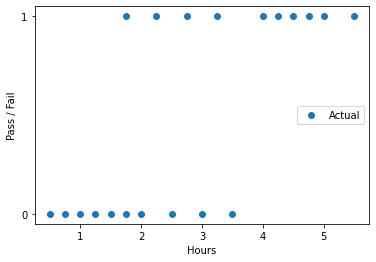

In [4]:
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

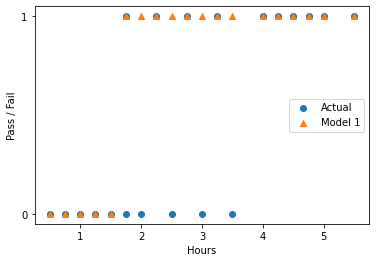

In [5]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.scatter(df['Hours'],df['Model1_Prediction'],label='Model 1',marker='^')
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

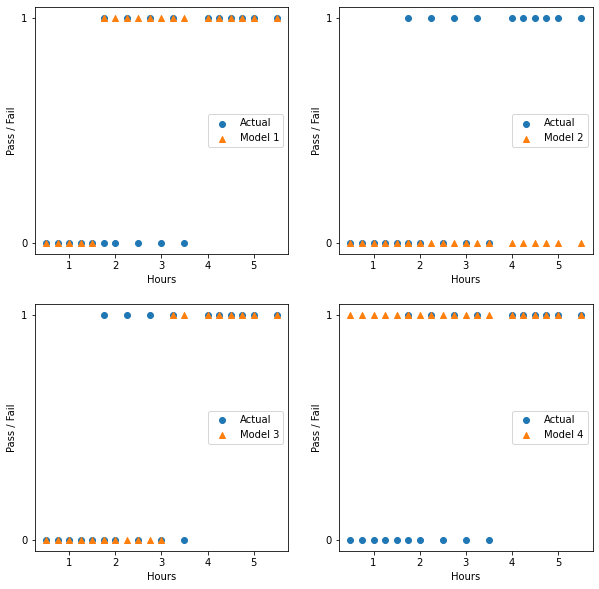

In [6]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    
    plt.scatter(df['Hours'],df['Pass'],label='Actual')
    plt.scatter(df['Hours'],df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.yticks([0,1])
    plt.legend(loc=7)
    plt.xlabel('Hours')
    plt.ylabel('Pass / Fail')

- Model 3 wrongly classified one failing student as passed and 3 passing students as failed
- Model 2 classified all studends on fail irrespective of the hours spent. Not a good model
- Model 4 classified all the students as passed irrespective of the hours spent
- Model one classified 5 failing students as pass

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Compute confusion matrix
# Compare Actual Vs Model 1 Predictions
cnf_matrix = confusion_matrix(df['Pass'],df['Model1_Prediction'],labels=[1,0])

In [9]:
cnf_matrix

array([[10,  0],
       [ 5,  5]], dtype=int64)

In [10]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [11]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [12]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['Pass'],df['Model1_Prediction'],labels=[1,0])

In [14]:
cnf_matrix

array([[10,  0],
       [ 5,  5]], dtype=int64)

In [15]:
print('TP:',true_positive(df['Pass'],df['Model1_Prediction']))
print('TN:',true_negative(df['Pass'],df['Model1_Prediction']))
print('FP:',false_positive(df['Pass'],df['Model1_Prediction']))
print('FN:',false_negative(df['Pass'],df['Model1_Prediction']))

TP: 10
TN: 5
FP: 5
FN: 0


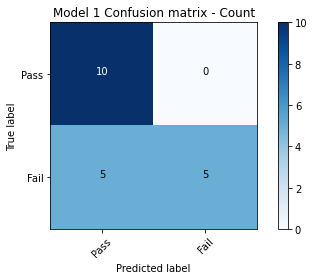

In [16]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title='Model 1 Confusion matrix - Count')

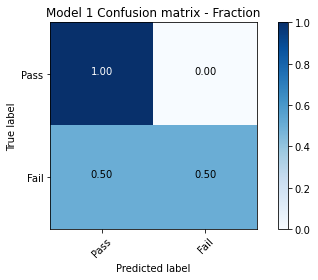

In [17]:
# Plot normalized confusion matrix (numbers are shown as a fraction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title='Model 1 Confusion matrix - Fraction',normalize=True)

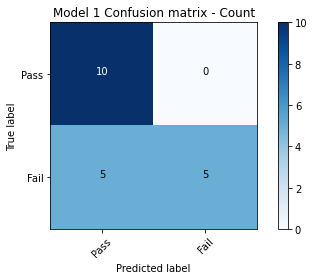

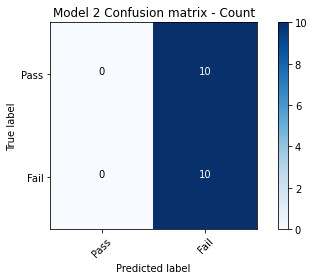

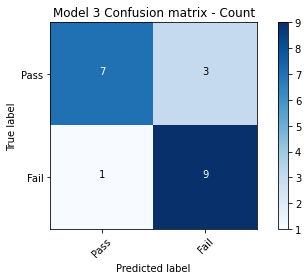

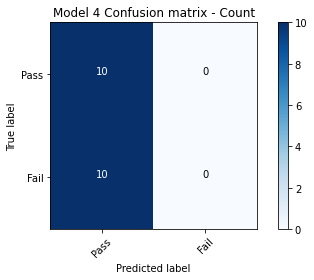

In [18]:
# Plot confusion matrix for the other models 1-4
# Show actual counts
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['Pass'],
                                  df[model.replace(' ','') + '_Prediction'],labels=[1,0])
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title= model + ' Confusion matrix - Count', normalize=False)

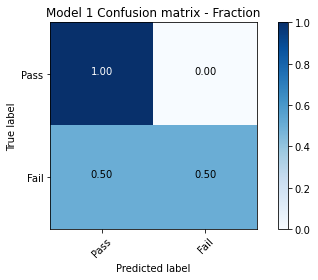

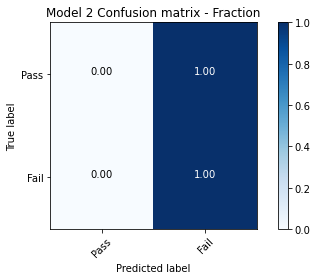

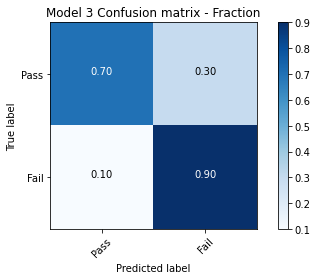

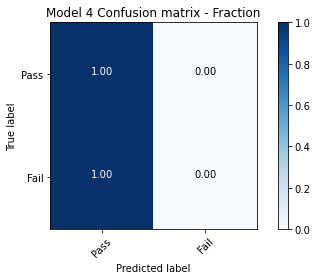

In [20]:
# Compute confusion matrix
# Show Fraction
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['Pass'],
                                  df[model.replace(' ','') + '_Prediction'],labels=[1,0])
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Pass','Fail'],
                      title= model + ' Confusion matrix - Fraction', normalize=True)

In [21]:
# Compute Metrics for all models
all_metrics = []
for model in models:
    print(model)
    colname = model.replace(' ','') + '_Prediction'

    metrics = binary_classifier_metrics(df['Pass'],df[colname])
    all_metrics.append(metrics)

Model 1
Model 2
Model 3
Model 4


In [22]:
# Create a metrics dataframe
# https://stackoverflow.com/questions/41168558/python-how-to-convert-json-file-to-dataframe/41168691
df_metrics=pd.DataFrame.from_dict(all_metrics)
df_metrics.index = models

In [23]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Ratios')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
         TruePositive  FalseNegative  FalsePositive  TrueNegative
Model 1            10              0              5             5
Model 2             0             10              0            10
Model 3             7              3              1             9
Model 4            10              0             10             0

Ratios
         Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model 1     1.0                0.0                0.5               0.5
Model 2     0.0                1.0                0.0               1.0
Model 3     0.7                0.3                0.1               0.9
Model 4     1.0                0.0                1.0               0.0

         Precision  Accuracy    F1
Model 1       0.67      0.75  0.80
Model 2       0.00      0.50  0.00
Model 3       0.88      0.80  0.78
Model 4       0.50      0.50  0.67


## Compute Metrics using SKLearn Classification Report

In [24]:
# Using SKLearn classification report
# Micro Average Vs Macro Average
# https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
for model in models:
    print(model)
    print(classification_report(
    df['Pass'],
    df[model.replace(' ','') + '_Prediction'],
    labels=[1,0],
    target_names=['Pass','Fail']))

Model 1
              precision    recall  f1-score   support

        Pass       0.67      1.00      0.80        10
        Fail       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20

Model 2
              precision    recall  f1-score   support

        Pass       0.00      0.00      0.00        10
        Fail       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

Model 3
              precision    recall  f1-score   support

        Pass       0.88      0.70      0.78        10
        Fail       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80       

C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

## Summary
** From these metrics, we can see that Model 1 and Model 3 are performing better than Model 2 and 4.
** Model 1 has higher Recall (it correctly identifies more positive samples) at the cost of higher False Positive Rate (negative samples were misclassified as positive)

** Model 3 offers balanced performance

# Binary Classifier Raw Score Evaluation
The actual output of many binary classification algorithms is a prediction score. The score indicates the system’s certainty that the given observation belongs to the positive class

To convert this raw score to a positive or negative class, we need to specify a cut-off. A sample with score greater than the cut-off is classified as positive class and a sample with score less than the cut-off is classified as negative class.

We need to now assess how algorithm would behave under different classification thresholds. Instead of manually performing this step, we can compute "AUC" metric. AUC refers to Area Under Curve. The curve here refers to the plot that has Probability of False Alarm (False Positive Rate) in X-Axis and Probability of Detection (Recall) in Y-Axis. By plotting False Alarm vs Recall at different cut-off thresholds, we can form a curve. AUC measures the area under this curve.

### Common Techniques for evaluating performance:

** Visually observe raw score using Plots
** Evaluate Area Under Curve (AUC) Metric
Reference:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

AUC is a different type of metric. It measures the ability of the model to predict a higher score for positive examples as compared to negative examples. Since AUC is independent of the selected threshold, you can get a sense of the prediction performance of your model from the AUC metric without picking a threshold.

** Reference:
https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html

In this example, let's look at how to compute AUC metric from raw scores and use that to compare model performance

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Exam Result Data set

This dataset contains Actual Pass or Fail for each sample. Model Prediction columns contains raw scores that the models came up with for that sample

### Columns

** Pass = Actual Pass or Fail for the sample

**  Model1_Prediction = Raw scores predicted by model 1

**  Model2_Prediction = Raw scores predicted by model 2

** Model3_Prediction = Raw scores predicted by model 3

** Model4_Prediction = Raw scores predicted by model 4

We are going to compare performance of these four models

Hours Spent and Exam Result (Pass/Fail) Data set:
https://en.wikipedia.org/wiki/Logistic_regression

In [27]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\Data Science\HoursExamSampleRawScore.csv")

In [28]:
df

,Hours,Pass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,0.50,0,0.12,0.22,0.01,0.53
1,0.75,0,0.23,0.27,0.09,0.51
2,1.00,0,0.31,0.28,0.13,0.96
3,1.25,0,0.35,0.17,0.15,0.75
4,1.50,0,0.42,0.42,0.20,0.50
5,1.75,0,0.52,0.08,0.21,0.82
6,1.75,1,0.52,0.34,0.27,0.99
7,2.00,0,0.55,0.10,0.31,0.87
8,2.25,1,0.62,0.37,0.32,0.78
9,2.50,0,0.66,0.26,0.38,0.62


## Plot Data
- Compare performance visuall

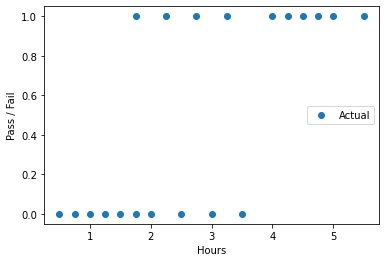

In [29]:
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.legend(loc=7)
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.show()

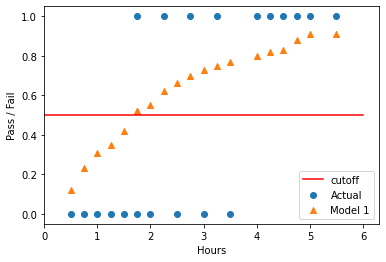

In [30]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df['Hours'],df['Pass'],label='Actual')
plt.scatter(df['Hours'],df['Model1_Prediction'],label='Model 1',marker='^')
plt.plot([0,6],[0.5,0.5],color='r',label='cutoff')
plt.xlim(left=0)
plt.xlabel('Hours')
plt.ylabel('Pass / Fail')
plt.legend(loc=4)
plt.show()

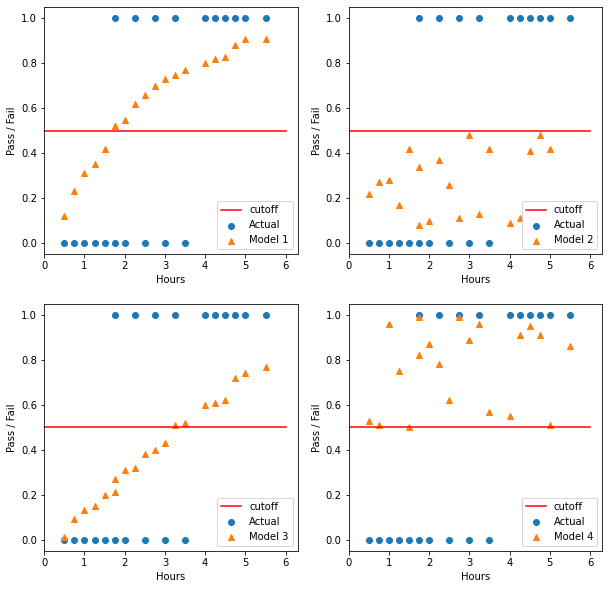

In [31]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    
    plt.scatter(df['Hours'],df['Pass'],label='Actual')
    plt.scatter(df['Hours'],df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.plot([0,6],[0.5,0.5],color='r',label='cutoff')
    plt.xlim(left=0)
    plt.legend(loc=4)
    plt.xlabel('Hours')
    plt.ylabel('Pass / Fail')

From the plots, we can observe that:

- Model 1 assigns a score that increases with number of hours spent studying. Model assigned score crosses cut-off threshold of 0.5 at around 1.5 hours of study time
- Model 2 has raw score of less than 0.5 for all samples
- Model 3 assigns a score that linearly changes with hours spent studying. Model assigned score crosses cut-off threshold of 0.5 at around 3 hours of study time
- Model 4 has raw score of greater than 0.5 for all samples

## Area Under Curve Metrics

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
print ('AUC Score')
for model in models:
    roc_score = roc_auc_score(df['Pass'], df[model.replace(' ','') + '_Prediction'])
    print(' {0}: {1:.3f}'.format(model,roc_score))

AUC Score
 Model 1: 0.895
 Model 2: 0.465
 Model 3: 0.900
 Model 4: 0.740


## Summary
- Models with AUC scores closer to 1 performs better

- Models with AUC score close to 0.5 is the baseline and it represents random-guessing

- Models with AUC score close to 0 is mis-classfying 1's as 0's and 0's as 1's

- From these metrics, we can see that Model 1 and Model 3 are performing better than Model 2 and 4.

- Between Model 1 and 3, Model 1 has higher Recall (it correctly identifies more positive samples) at the cost of higher False Positive Rate (negative samples were misclassified as positive)
Model 3 offers balanced performance

### Evaluating Performance of a Multi-class Classifier
Multi-class Model is used for predicting one of many possible outcomes

Exam Grades: A, B, C, D Dress Size: Small, Medium, Large, X-Large

Typical metrics used in multiclass are the same as the metrics used in the binary classification case. The metric is calculated for each class by treating it as a binary classification problem after grouping all the other classes as belonging to the second class. Then the binary metric is averaged over all the classes to get either a macro average (treat each class equally) or weighted average (weighted by class frequency) metric.

** Reference:
https://docs.aws.amazon.com/machine-learning/latest/dg/multiclass-classification.html

To find out how good the model predictions are, we need to check predictions against previously unseen samples that were not used for training. Usually, 30% of the available samples are reserved for testing while remaining 70% of samples are used for training.

By comparing predicted values against known results in test data, we can assess overall model performance

Common Techniques for evaluating performance:

- Visually observe using Plots
- Confusion Matrix
- Evaluate with Metrics like Recall, Precision, F1 Score and so forth
While Plots are good for humans to visually observe the results, we often need a single metric that can indicate quality of a model. This can be useful for programmatically identifying which model is performing better (for example: using automatic model tuning to select the best performing model)

** Reference:
https://docs.aws.amazon.com/machine-learning/latest/dg/multiclass-classification.html
Confusion Matrix:
https://en.wikipedia.org/wiki/Confusion_matrix

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [37]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']

# Labeled Classes
labels=[0,1,2]

# Class Names
# Setosa = 0, Versicolor = 1, Virginica = 2 
classes = ['Setosa','Versicolor','Virginica']

df = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\Data Science\IrisSample.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class,NumericClass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,5.8,4.0,1.2,0.2,Iris-setosa,0,0,1,0,0
1,5.7,4.4,1.3,0.4,Iris-setosa,0,1,1,0,1
2,5.1,3.4,1.5,0.2,Iris-setosa,0,0,1,0,2
3,5.4,3.9,1.7,0.4,Iris-setosa,0,0,1,0,2
4,4.3,3.0,1.1,0.1,Iris-setosa,0,1,1,0,1
5,4.9,2.4,3.3,1.0,Iris-versicolor,1,1,1,1,0
6,5.9,3.0,4.2,1.5,Iris-versicolor,1,1,1,2,1
7,6.6,3.0,4.4,1.4,Iris-versicolor,1,2,1,1,2
8,5.0,2.3,3.3,1.0,Iris-versicolor,1,1,1,2,0
9,6.2,2.9,4.3,1.3,Iris-versicolor,1,1,1,1,0


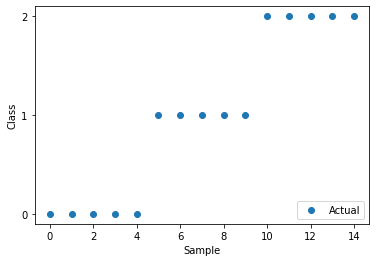

In [38]:
plt.figure()
plt.scatter(df.index,df['NumericClass'],label='Actual')
plt.legend(loc=4)
plt.yticks([0,1,2])
plt.xlabel('Sample')
plt.ylabel('Class')
plt.show()

## Plot Data
- Compare performance visually

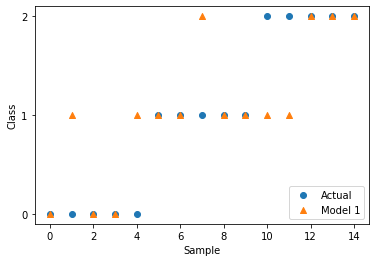

In [39]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df.index,df['NumericClass'],label='Actual')
plt.scatter(df.index,df['Model1_Prediction'],label='Model 1',marker='^')
plt.legend(loc=4)
plt.yticks([0,1,2])
plt.xlabel('Sample')
plt.ylabel('Class')
plt.show()

- Overlap of the blue and triangle dots indicate correct classification
- 2 setosa were incorrectly classified as Versicolor
- One Versicolor was misclassified as Virginica
- 2 Virginica were correctly classified and 2 misclassified as Versicolor

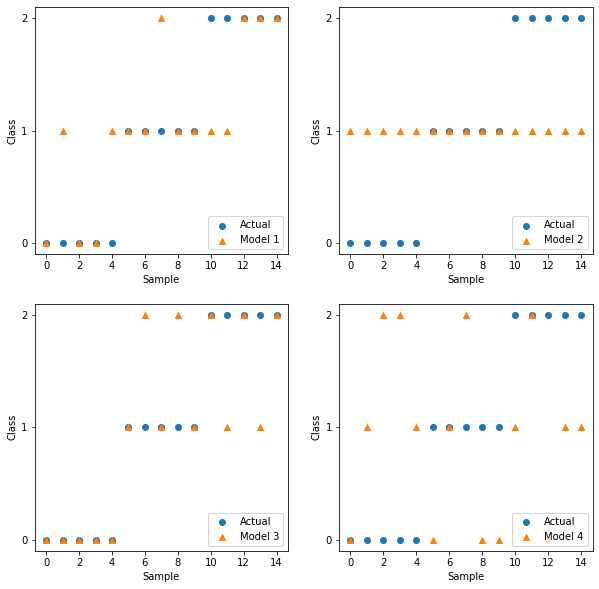

In [40]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    
    plt.scatter(df.index,df['NumericClass'],label='Actual')
    plt.scatter(df.index,df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.yticks([0,1,2])
    plt.legend(loc=4)
    plt.xlabel('Sample')
    plt.ylabel('Class')

- Model 1 and 3 seem to perform better

## Confusion Matrix
- Confusion Matrix is a table that summarizes performance of classification model.

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['NumericClass'],
                              df['Model1_Prediction'],labels=labels)

In [44]:
cnf_matrix

array([[3, 2, 0],
       [0, 4, 1],
       [0, 2, 3]], dtype=int64)

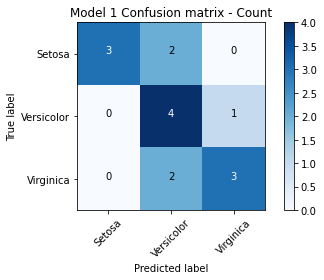

In [45]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Model 1 Confusion matrix - Count')

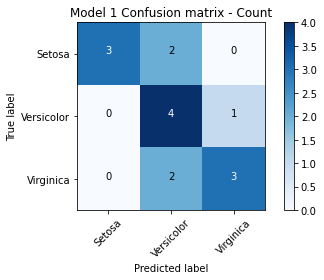

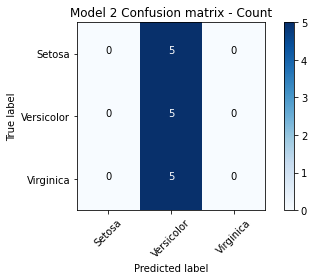

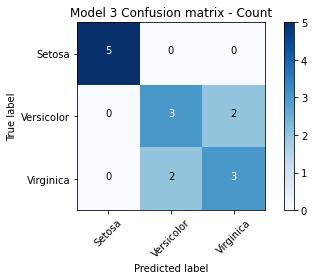

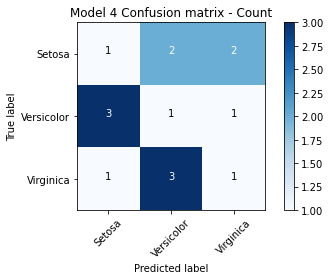

In [46]:
# Plot confusion matrix
# Show actual counts
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['NumericClass'],
                                  df[model.replace(' ','') + '_Prediction'],
                                  labels=labels)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,
                      title= model + ' Confusion matrix - Count', normalize=False)

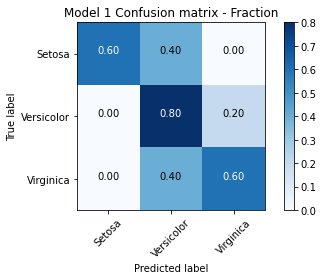

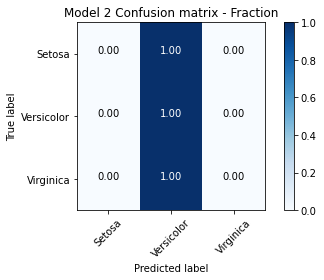

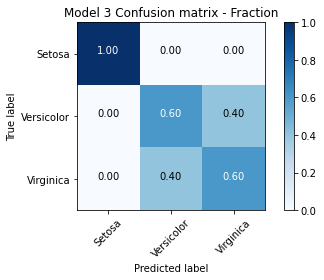

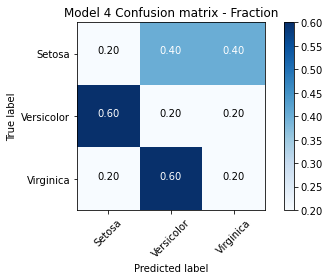

In [47]:
# Compute confusion matrix
# Show Ratio
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['NumericClass'],
                                  df[model.replace(' ','') + '_Prediction'],labels=labels)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,
                      title= model + ' Confusion matrix - Fraction', normalize=True)

In [48]:
# Using SKLearn classification report
# Micro vs Macro Average
# Reference: 
#  https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
for model in models:
    print(model)
    print(classification_report(
    df['NumericClass'],
    df[model.replace(' ','') + '_Prediction'],
    labels=labels,
    target_names=classes))

Model 1
              precision    recall  f1-score   support

      Setosa       1.00      0.60      0.75         5
  Versicolor       0.50      0.80      0.62         5
   Virginica       0.75      0.60      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.67      0.68        15
weighted avg       0.75      0.67      0.68        15

Model 2
              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00         5
  Versicolor       0.33      1.00      0.50         5
   Virginica       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

Model 3
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         5
  Versicolor       0.60      0.60      0.60         5
   Virginica       0.60      0.60      0.60        

C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\derri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summary
- Macro average = Treat all classes equally. Average of individual class scores

- Weighted average = Take frequency of the classes into consideration.

- Weighted Average is recommended if there is uneven class distribution

- In this example, Weighted Average of Model 1 and Model 3 are highest.

** Reference:
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

https://docs.aws.amazon.com/machine-learning/latest/dg/multiclass-classification.html